# Transpiler

Qiskit's Transpiler module is used for modularity of the generated circuits. This allows s to generate new transformations, combine and segregate circuits. This is what is called as a transpiler pass. The pass pipeline is maintained by the Pass Manager, which schedules the passes and also allows passes to communicate with each other by providing a shared space.

In [1]:
from qiskit import *
circuit = QuantumCircuit(3)
circuit.ccx(0,1,2)
circuit.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

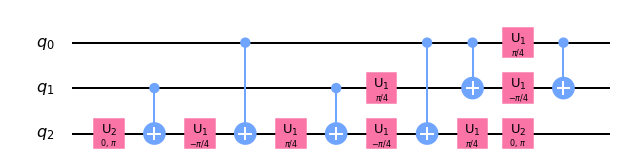

In [8]:
from qiskit.compiler import *
from qiskit.transpiler import *
from qiskit.transpiler.passes import Unroller
p = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(p)
circ = pm.run(circuit)
circ.draw(output = 'mpl')

## Pass Variations

There are different kinds of Pass Managers and they work well in different scenarios. They do the same work but use different algorithms to do so. 
Below 4 passes have been implemented:
1. Basic Swap - Which is a minimum effort to insert swap gates to map the DAG onto a coupling map. When a cx is not in the coupling map possibilities, it inserts one or more swaps in front to make it compatible.
2. Look Ahead Swap - This algorithm searches through the available combinations of SWAP gates by means of a narrowed best first/beam search.
3. Stochastic Swap - Which uses a randomized algorithm.
4. Sabre Swap - This algorithm starts from an initial layout of virtual qubits onto physical qubits, and iterates over the circuit DAG until all gates are exhausted, inserting SWAPs along the way.

In [65]:
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap, SabreSwap

coupled = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6,7], [7,8]]

circuit = QuantumCircuit(9)
circuit.h(1)
circuit.cx(0, 5)
circuit.cx(6, 0)
circuit.cx(0, 2)
circuit.cx(5, 1)
circuit.cx(3, 2)
circuit.cx(8, 3)
circuit.cx(2, 6)

map1 = CouplingMap(couplinglist=coupled)

basic = BasicSwap(coupling_map=map1)
pm = PassManager(basic)
circ1 = pm.run(circuit)

lookahead = LookaheadSwap(coupling_map=map1)
pm = PassManager(lookahead)
circ2 = pm.run(circuit)

stochastic = StochasticSwap(coupling_map=map1)
pm = PassManager(stochastic)
circ3 = pm.run(circuit)

sabre = SabreSwap(coupling_map=map1)
pm = PassManager(sabre)
circ4 = pm.run(circuit)

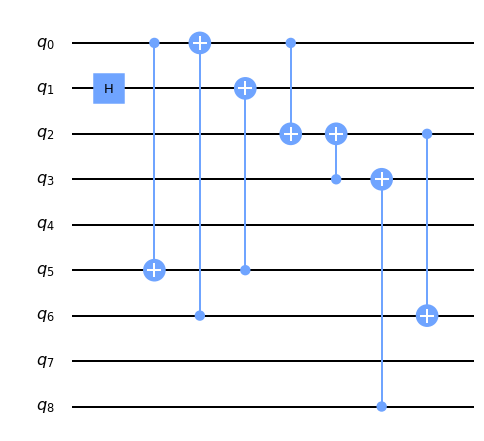

In [15]:
circuit.draw(output='mpl')

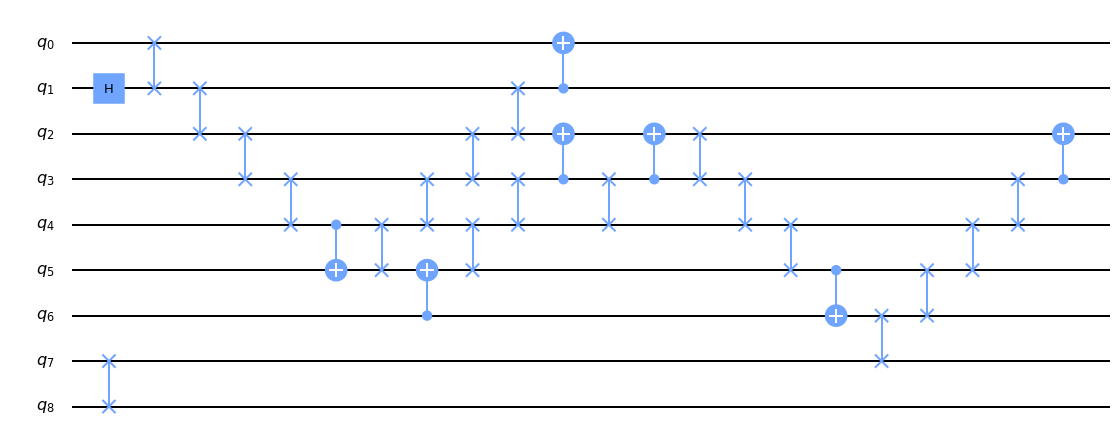

In [16]:
circ1.draw(output='mpl')

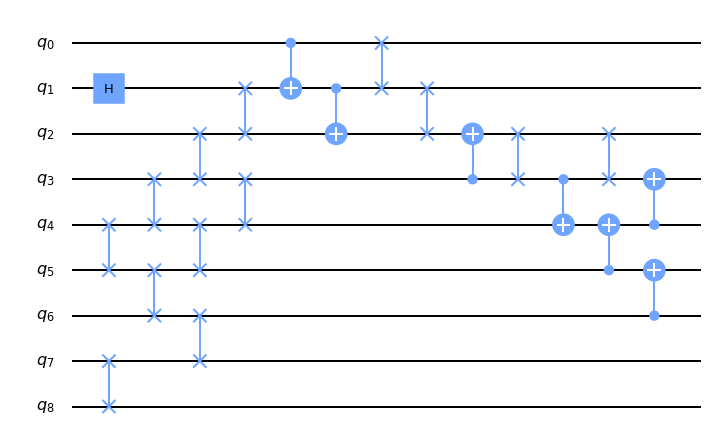

In [17]:
circ2.draw(output='mpl')

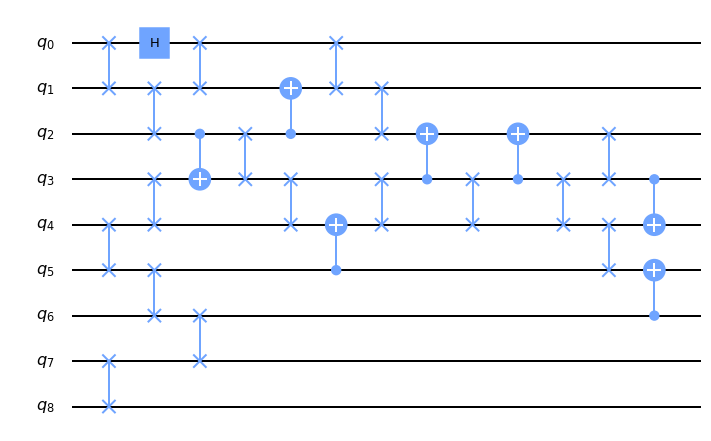

In [18]:
circ3.draw(output='mpl')

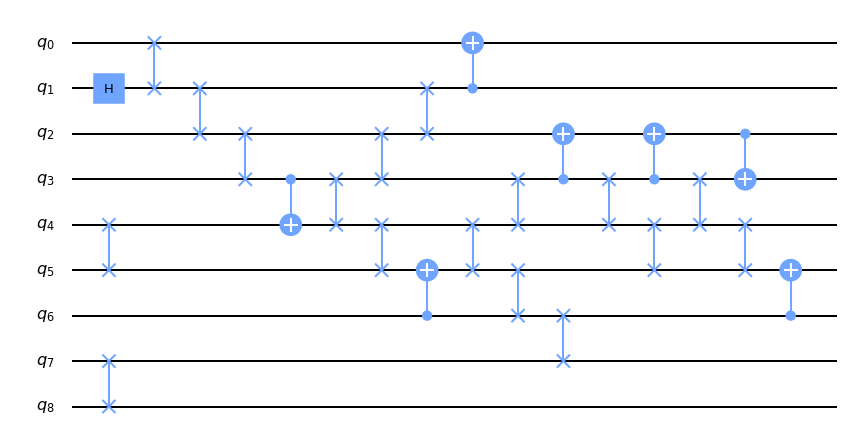

In [66]:
circ4.draw(output='mpl')

## Optimization Levels

Various Pass Managers are pre defined and various levels of optimization are possible, from 0 to 3. 

1. optimization_level=0: Just maps the circuit to the backend, with no explicit optimization.
2. optimization_level=1: Maps the circuit, but also does light-weight optimizations by collapsing adjacent gates.
3. optimization_level=2: Medium-weight optimization, including a noise-adaptive layout and a gate-cancellation procedure based on gate commutation relationships.
4. optimization_level=3: Heavy-weight optimization, which in addition to previous steps, does resynthesis of two-qubit blocks of gates in the circuit.

In [25]:
import math
from qiskit.test.mock import FakeTokyo
backend = FakeTokyo()
level0 = transpile(circuit, backend=backend, seed_transpiler=11, optimization_level=0)
print('Number of Gates: ', level0.count_ops())
print('Depth: ', level0.depth())

Number of Gates:  OrderedDict([('cx', 19), ('u2', 1)])
Depth:  14


In [26]:
level1 = transpile(circuit, backend=backend, seed_transpiler=11, optimization_level=1)
print('Number of Gates: ', level1.count_ops())
print('Depth: ', level1.depth())

Number of Gates:  OrderedDict([('cx', 15), ('u2', 5)])
Depth:  10


In [27]:
level2 = transpile(circuit, backend=backend, seed_transpiler=11, optimization_level=2)
print('Number of Gates: ', level2.count_ops())
print('Depth: ', level2.depth())

Number of Gates:  OrderedDict([('cx', 7), ('u2', 5)])
Depth:  7


In [28]:
level3 = transpile(circuit, backend=backend, seed_transpiler=11, optimization_level=3)
print('Number of Gates: ', level3.count_ops())
print('Depth: ', level3.depth())

Number of Gates:  OrderedDict([('cx', 7), ('u2', 5)])
Depth:  7
